In [ ]:
import datetime
from typing import Tuple, Union
import requests
import pandas as pd
from enum import Enum


class Constant(Enum):

    STOCK = 'stock'
    CURRENCY = 'currency'



class FinViz:
    ticker_list = ["EURUSD", "GBPUSD", "USDJPY", "USDCAD", "USDCHF", "AUDUSD", "NZDUSD", "EURGBP", "GBPJPY", "BTCUSD",
                   "TOP"]
    time_frame_list = ["i1", "i3", "i5", "h", "d", "w", "m"]
    URL = "https://elite.finviz.com/api/quote.ashx?instrument=forex&rev=356737"

    # URL = "https://elite.finviz.com/api/quote.ashx?instrument=stock&rev=356737"
    def __init__(self, asset_type: str, timeout: int = 10, time_frame: str = 'i1') -> None:
        """FinViz class to interact with the finviz website

        Args:
            timeout (int, optional): Specifies the timeout to server in seconds. Defaults to 10.
        """

        self.time_frame = time_frame
        self.asset_type = asset_type
        self._timeout = timeout
        self._time: int = -1
        self._volume: int = -1
        self._price: float = -1.0
        if asset_type == Constant.STOCK:

            self.URL = "https://elite.finviz.com/api/quote.ashx?instrument=stock&rev=356737"

        else:
            self.URL = "https://elite.finviz.com/api/quote.ashx?instrument=forex&rev=356737"

    def get_data(self, time_frame: str = "i1", ticker: str = "EURUSD") -> Tuple[int, int, float]:
        """Get the volume in the last specified time frame

        Args:
            time_frame (str): Choose from time_frame_list:
            ticker (str): Ticker chosen from ticker list e.g.: EURUSD

        Raises:
            Exception: If incorrect timeframe specified
            Exception: If incorrect ticker specified
            Exception: No/Error response from server

        Returns:
            int: time in POSIX format
            int: volume
            float: price
        """
        if time_frame not in self.time_frame_list:
            raise Exception("Incorrect time frame specified, please choose from the list", FinViz.time_frame_list)

        # if ticker not in self.ticker_list:
        #     raise Exception("Incorrect ticker specified, please choose from the list", FinViz.ticker_list)

        payload = {"ticker": ticker, "timeframe": time_frame, "type": "new"}

        # Headers required to show that it is an actual computer
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
        response = requests.get(self.URL, params=payload, timeout=self._timeout, headers=headers)

        if response.status_code != 200:
            raise Exception("No response from server")

        json_response = response.json()
        self._time = int(json_response["date"][-1])
        self._volume = int(json_response["volume"][-1])
        self._price = float(json_response["close"][-1])
        return self._time, self._volume, self._price

    def get_all_data(self, time_frame: str = "i1", ticker: str = "EURUSD"):

        """Get the volume in the last specified time frame

        Args:
            time_frame (str): Choose from time_frame_list:
            ticker (str): Ticker chosen from ticker list e.g.: EURUSD

        Raises:
            Exception: If incorrect timeframe specified
            Exception: If incorrect ticker specified
            Exception: No/Error response from server

        Returns:
            int: time in POSIX format
            int: volume
            float: price
        """
        if time_frame not in self.time_frame_list:
            raise Exception("Incorrect time frame specified, please choose from the list", FinViz.time_frame_list)

        # if ticker not in self.ticker_list:
        #     raise Exception("Incorrect ticker specified, please choose from the list", FinViz.ticker_list)

        payload = {"ticker": ticker, "timeframe": time_frame, "type": "new"}

        # Headers required to show that it is an actual computer
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
        response = requests.get(self.URL, params=payload, timeout=self._timeout, headers=headers)

        if response.status_code != 200:
            print(f'asset type: {self.asset_type}')
            raise Exception("No response from server")

        json_response = response.json()
        # self._time = int(json_response["date"][:-2])
        # self._volume = int(json_response["volume"][:-2])
        # self._price = float(json_response["lastOpen"])
        # return self._time, self._volume, self._price
        all_volumes = [float(i) for i in json_response["volume"]]
        all_opens = [float(i) for i in json_response["open"]]
        all_closes = [float(i) for i in json_response["close"]]
        all_dates = [float(i) for i in json_response["date"]]

        return all_volumes, all_opens, all_closes, all_dates

    def get_time(self, human_readable: bool = True) -> Union[int, datetime.datetime]:
        """Returns time from server

        Args:
            human_readable (bool, optional): Set to True if you want in datetime format. Defaults to True.

        Raises:
            Exception: If get_data() method not called for first initialization

        Returns:
            Union[int, datetime.datetime]: time in either POSIX or datetime format
        """
        if self._time == -1:
            raise Exception("Please run the API get_data() method before accessing the time")
        if human_readable:
            return datetime.datetime.fromtimestamp(self._time)
        else:
            return self._time

    def get_volume(self):
        if self._volume == -1:
            raise Exception("Please run the API get_data() method before accessing this variable")
        return self._volume

    def get_price(self):
        if self._price == -1.0:
            raise Exception("Please run the API get_data() method before accessing this variable")


if __name__ == "__main__":
    test = FinViz(asset_type=Constant.STOCK)
    # r = test.get_all_data()
    # for k in r:
    #     print(len(k))
    #     print(k)
    # print(jr)
    all_volumes, all_opens, all_closes, all_dates = test.get_all_data(ticker='NFLX')

    print(all_volumes)
    data_dict = {
        'date-time': [datetime.datetime.fromtimestamp(t) for t in all_dates],
        'open': all_opens,
        'close': all_closes,
        'volume': all_volumes
    }

    df = pd.DataFrame(data_dict)

    df.to_csv('./NFLX_OPT_Dataset.csv')

    # time, volume, price = test.get_data(ticker='NFLX')
    # print(type(time))
    # print("Time:", time, "Volume:", volume, "Price:", price, sep="\n")
    #
    # print("Human readable Time:", test.get_time())


[18.0, 63.0, 1.0, 9.0, 17.0, 158.0, 953.0, 42.0, 521.0, 27.0, 75.0, 53.0, 10.0, 3.0, 10.0, 44.0, 11.0, 1.0, 10.0, 1.0, 1.0, 11.0, 65.0, 10.0, 52.0, 1.0, 14.0, 983.0, 59.0, 6.0, 24.0, 8.0, 7.0, 16.0, 2.0, 6.0, 11.0, 7.0, 11.0, 89.0, 2.0, 3.0, 24.0, 4.0, 3.0, 205.0, 1.0, 6.0, 5.0, 12.0, 4.0, 2.0, 35.0, 2.0, 61.0, 1296.0, 580.0, 50.0, 266.0, 359.0, 76.0, 111.0, 773.0, 1554.0, 941.0, 352.0, 289.0, 96.0, 17.0, 639.0, 69.0, 257.0, 156.0, 160.0, 1229.0, 70.0, 6.0, 205.0, 101.0, 312.0, 42.0, 4.0, 165.0, 19.0, 153.0, 14.0, 263.0, 202.0, 59.0, 15.0, 189.0, 194.0, 9.0, 96.0, 59.0, 147.0, 116.0, 31.0, 3.0, 33.0, 85.0, 52.0, 19.0, 34.0, 622.0, 200.0, 58.0, 60.0, 32.0, 158.0, 70.0, 33.0, 225.0, 116.0, 167.0, 39642.0, 12142.0, 8815.0, 4300.0, 3301.0, 8771.0, 3985.0, 3720.0, 9367.0, 7508.0, 3224.0, 3709.0, 2504.0, 2945.0, 4598.0, 14586.0, 4700.0, 3921.0, 5881.0, 5043.0, 7988.0, 7189.0, 4037.0, 2319.0, 4260.0, 14094.0, 4116.0, 5373.0, 10914.0, 3065.0, 2750.0, 3275.0, 9017.0, 4976.0, 1673.0, 810.0, 4565

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Initialize FinViz API
finviz = FinViz(asset_type=Constant.STOCK)

# Fetch data for a specific stock (e.g., 'NFLX')
ticker = 'NFLX'
all_volumes, all_opens, all_closes, all_dates = finviz.get_all_data(ticker=ticker)

# Create a DataFrame from the API data
data = pd.DataFrame({
    'Date': [pd.Timestamp.fromtimestamp(t) for t in all_dates],
    'Open': all_opens,
    'Close': all_closes,
    'Volume': all_volumes
})

# Calculate additional features
data['Prev Close'] = data['Close'].shift(1)
data['High'] = data['Close'].rolling(window=2).max()  # Approximation
data['Low'] = data['Close'].rolling(window=2).min()  # Approximation
data['Change from Open'] = (data['Close'] - data['Open']) / data['Open']
data['Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
data['Average Volume'] = data['Volume'].rolling(window=10).mean()
data['Relative Volume'] = data['Volume'] / data['Average Volume']
data['Average True Range'] = data[['High', 'Low', 'Prev Close']].max(axis=1) - data[['High', 'Low', 'Prev Close']].min(axis=1)

# We don't have 'Short Ratio' from the API, so we'll exclude it
data['Price'] = data['Close']

# Fill NaN values
data = data.fillna(0)

# Prepare features and target
X = data[['Average True Range', 'Change from Open', 'Average Volume', 'Relative Volume', 'Volume', 'Prev Close', 'Open', 'High', 'Low', 'Price']]
y = data['Change']

# Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Sort and print feature importances
sorted_idx = perm_importance.importances_mean.argsort()
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.3f}")

High: 0.006
Low: 0.006
Open: 0.022
Average Volume: 0.027
Price: 0.027
Volume: 0.028
Relative Volume: 0.038
Prev Close: 0.078
Average True Range: 0.902
Change from Open: 1.280


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import concurrent.futures

def fetch_data(ticker):
    finviz = FinViz(asset_type=Constant.STOCK)
    all_volumes, all_opens, all_closes, all_dates = finviz.get_all_data(ticker=ticker)

    data = pd.DataFrame({
        'Date': [pd.Timestamp.fromtimestamp(t) for t in all_dates],
        'Open': all_opens,
        'Close': all_closes,
        'Volume': all_volumes,
        'Ticker': ticker
    })

    return data

def process_ticker_data(ticker):
    data = fetch_data(ticker)

    # Calculate additional features
    data['Prev Close'] = data['Close'].shift(1)
    data['High'] = data['Close'].rolling(window=2).max()
    data['Low'] = data['Close'].rolling(window=2).min()  # Approximation
    data['Change from Open'] = (data['Close'] - data['Open']) / data['Open']
    data['Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
    data['Average Volume'] = data['Volume'].rolling(window=10).mean()
    data['Relative Volume'] = data['Volume'] / data['Average Volume']
    data['Average True Range'] = data[['High', 'Low', 'Prev Close']].max(axis=1) - data[['High', 'Low', 'Prev Close']].min(axis=1)
    data['Price'] = data['Close']

    # New variables
    data['Gap'] = (data['Open'] - data['Prev Close']) / data['Prev Close']

    finviz = FinViz(asset_type=Constant.STOCK)
    time, volume, price = finviz.get_data(ticker=ticker)

    average_volume = data['Average Volume'].mean()
    data['Volume/Float'] = data['Volume'] / average_volume if average_volume != 0 else 0

    return data

# List of tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NFLX']

# Fetch and process data for all tickers concurrently
with concurrent.futures.ThreadPoolExecutor() as executor:
    all_data = list(executor.map(process_ticker_data, tickers))

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Fill NaN values
combined_data = combined_data.fillna(0)

# Prepare features and target
X = combined_data[['Average True Range', 'Change from Open', 'Average Volume', 'Relative Volume',
                   'Volume', 'Prev Close', 'Open', 'High', 'Low', 'Price', 'Gap', 'Volume/Float']]
y = combined_data['Change']

# Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Sort and print feature importances
sorted_idx = perm_importance.importances_mean.argsort()
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.3f}")

Prev Close: 0.000
Average Volume: 0.000
Open: 0.000
Price: 0.000
Low: 0.000
High: 0.001
Volume: 0.001
Volume/Float: 0.001
Relative Volume: 0.001
Average True Range: 0.012
Gap: 0.714
Change from Open: 1.567


               feature  importance
1     Change from Open    1.303190
10                 Gap    0.710191
0   Average True Range    0.013941
11        Volume/Float    0.000761
3      Relative Volume    0.000176
9                Price   -0.000083
8                  Low   -0.000149
5           Prev Close   -0.000214
6                 Open   -0.000282
7                 High   -0.000372
4               Volume   -0.000532
2       Average Volume   -0.002743


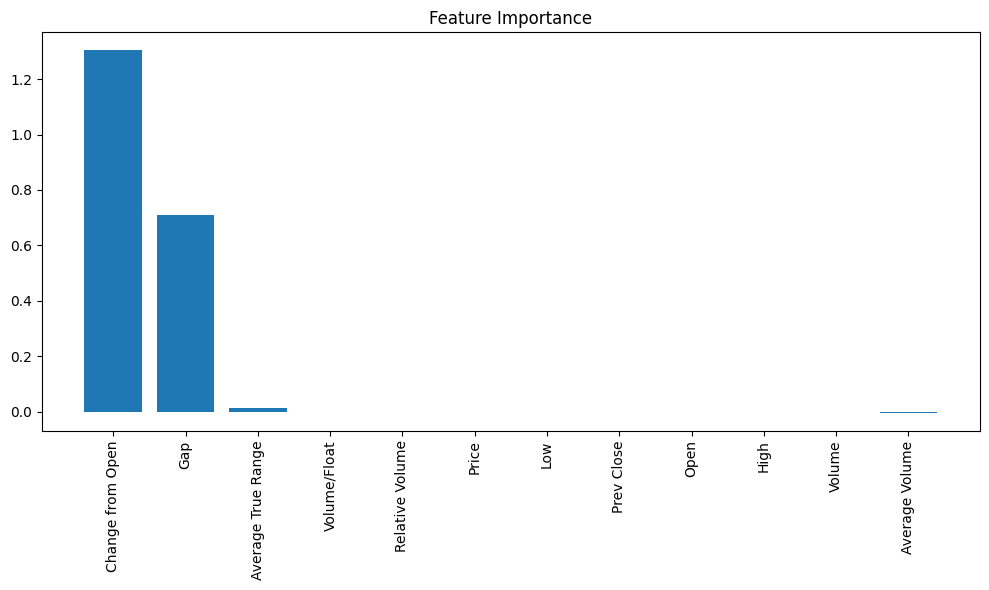

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import concurrent.futures

def fetch_data(ticker):
    finviz = FinViz(asset_type=Constant.STOCK)
    all_volumes, all_opens, all_closes, all_dates = finviz.get_all_data(ticker=ticker)

    data = pd.DataFrame({
        'Date': [pd.Timestamp.fromtimestamp(t) for t in all_dates],
        'Open': all_opens,
        'Close': all_closes,
        'Volume': all_volumes,
        'Ticker': ticker
    })

    return data

def process_ticker_data(ticker):
    data = fetch_data(ticker)

    # Calculate additional features
    data['Prev Close'] = data['Close'].shift(1)
    data['High'] = data['Close'].rolling(window=2).max()
    data['Low'] = data['Close'].rolling(window=2).min()
    data['Change from Open'] = (data['Close'] - data['Open']) / data['Open']
    data['Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
    data['Average Volume'] = data['Volume'].rolling(window=10).mean()
    data['Relative Volume'] = data['Volume'] / data['Average Volume']
    data['Average True Range'] = data[['High', 'Low', 'Prev Close']].max(axis=1) - data[['High', 'Low', 'Prev Close']].min(axis=1)
    data['Price'] = data['Close']

    # New variables
    data['Gap'] = (data['Open'] - data['Prev Close']) / data['Prev Close']

    finviz = FinViz(asset_type=Constant.STOCK)
    time, volume, price = finviz.get_data(ticker=ticker)

    average_volume = data['Average Volume'].mean()
    data['Volume/Float'] = data['Volume'] / average_volume if average_volume != 0 else 0

    return data

# List of tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NFLX']

# Fetch and process data for all tickers concurrently
with concurrent.futures.ThreadPoolExecutor() as executor:
    all_data = list(executor.map(process_ticker_data, tickers))

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Fill NaN values
combined_data = combined_data.fillna(0)

# Prepare features and target
X = combined_data[['Average True Range', 'Change from Open', 'Average Volume', 'Relative Volume',
                   'Volume', 'Prev Close', 'Open', 'High', 'Low', 'Price', 'Gap', 'Volume/Float']]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Sort and print feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import concurrent.futures


def fetch_data(ticker):
    finviz = FinViz(asset_type=Constant.STOCK)
    all_volumes, all_opens, all_closes, all_dates = finviz.get_all_data(ticker=ticker)

    data = pd.DataFrame({
        'Date': [pd.Timestamp.fromtimestamp(t) for t in all_dates],
        'Open': all_opens,
        'Close': all_closes,
        'Volume': all_volumes,
        'Ticker': ticker
    })

    return data

def process_ticker_data(ticker):
    data = fetch_data(ticker)

    # Calculate additional features
    data['Prev Close'] = data['Close'].shift(1)
    data['High'] = data['Close'].rolling(window=2).max()
    data['Low'] = data['Close'].rolling(window=2).min()
    data['Change'] = (data['Close'] - data['Prev Close']) / data['Prev Close']
    data['Average Volume'] = data['Volume'].rolling(window=10).mean()
    data['Relative Volume'] = data['Volume'] / data['Average Volume']
    data['Average True Range'] = data[['High', 'Low', 'Prev Close']].max(axis=1) - data[['High', 'Low', 'Prev Close']].min(axis=1)
    data['Price'] = data['Close']

    # New variables
    data['Gap'] = (data['Open'] - data['Prev Close']) / data['Prev Close']

    finviz = FinViz(asset_type=Constant.STOCK)
    time, volume, price = finviz.get_data(ticker=ticker)

    average_volume = data['Average Volume'].mean()
    data['Volume/Float'] = data['Volume'] / average_volume if average_volume != 0 else 0

    return data

# List of tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NFLX']

# Fetch and process data for all tickers concurrently
with concurrent.futures.ThreadPoolExecutor() as executor:
    all_data = list(executor.map(process_ticker_data, tickers))

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Fill NaN values
combined_data = combined_data.fillna(0)

# Prepare features and target
X = combined_data[['Average True Range', 'Average Volume', 'Relative Volume',
                   'Volume', 'Prev Close', 'Open', 'High', 'Low', 'Price', 'Gap', 'Volume/Float']]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Sort and print feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
})

feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

NameError: name 'train_test_split' is not defined

               feature  importance
0   Average True Range    0.438591
9                  Gap    0.388678
5                 Open    0.029043
2      Relative Volume    0.024256
1       Average Volume    0.022724
8                Price    0.022719
10        Volume/Float    0.021334
3               Volume    0.020124
4           Prev Close    0.015580
7                  Low    0.008809
6                 High    0.008144


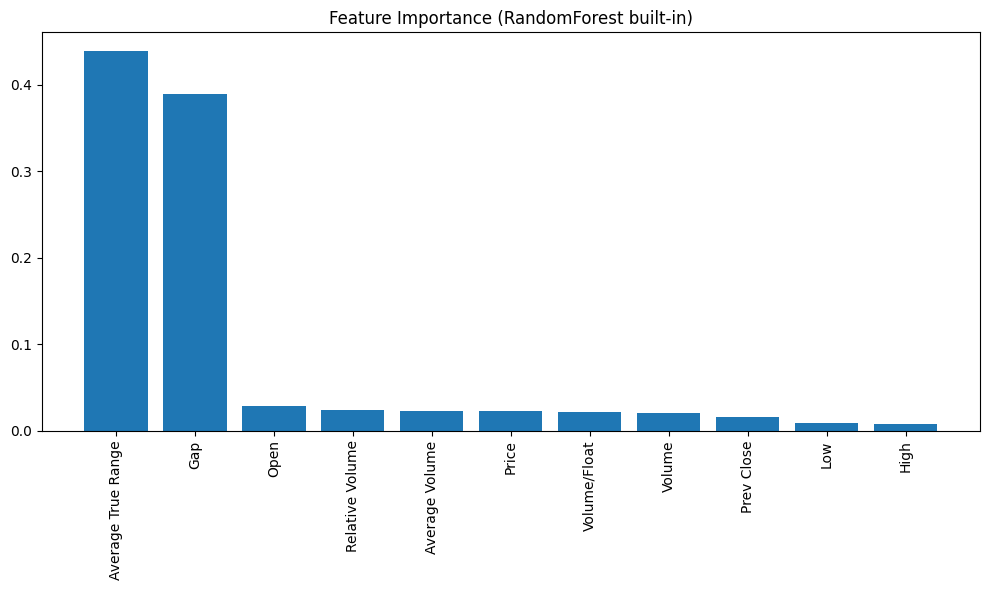

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance (RandomForest built-in)')
plt.tight_layout()
plt.show()

               feature  importance
0   Average True Range    0.508129
9                  Gap    0.448767
5                 Open    0.019675
8                Price    0.008226
3               Volume    0.004266
10        Volume/Float    0.004061
1       Average Volume    0.003258
2      Relative Volume    0.001863
4           Prev Close    0.000772
7                  Low    0.000543
6                 High    0.000440


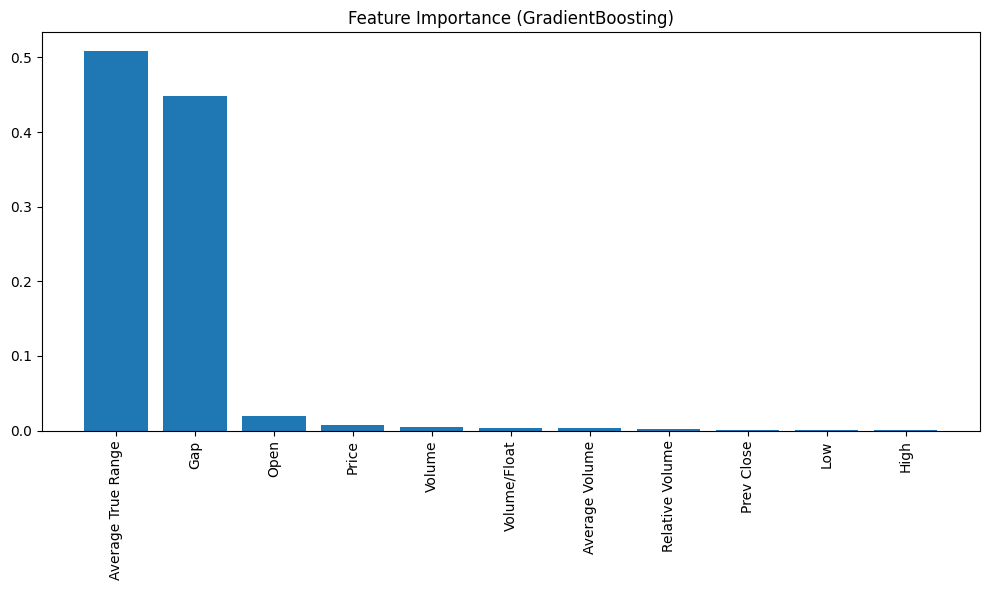

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance (GradientBoosting)')
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.6 MB/s eta 0:00:00


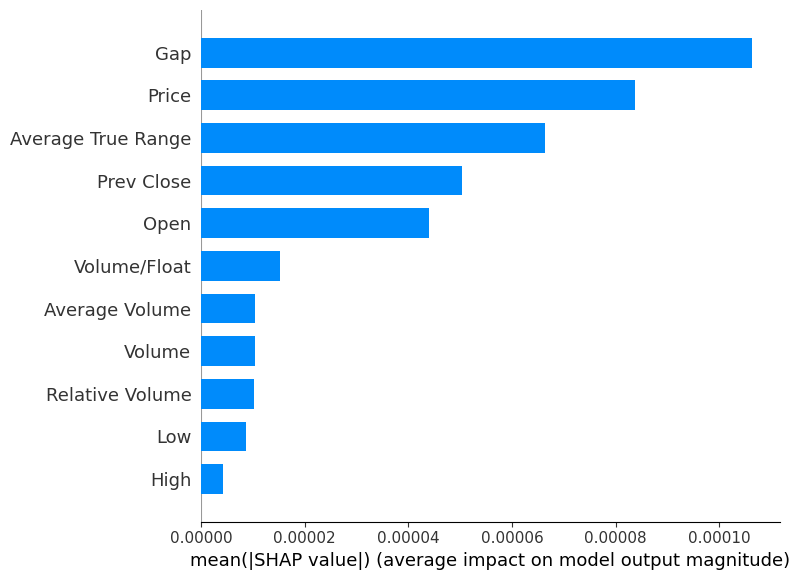

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install shap

import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

# Create the summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.tight_layout()
plt.show()